<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/medical_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
raw_data=pd.read_csv('/content/drive/My Drive/datasets/mtsamples.csv')

In [45]:
raw_data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [46]:
req_data=raw_data[['medical_specialty','transcription']]
req_data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [47]:
req_data[req_data.isna().any(axis=1)]

,medical_specialty,transcription
97,Urology,NaN
116,Urology,NaN
205,Surgery,NaN
263,Surgery,NaN
459,Surgery,NaN
622,Surgery,NaN
628,Surgery,NaN
680,Surgery,NaN
729,Surgery,NaN
871,Surgery,NaN


In [48]:
req_data=req_data.dropna()

In [49]:
req_data=req_data.reset_index()

In [50]:
req_data=req_data.drop(columns={'index'})

In [51]:
req_data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [52]:
import string
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
def removepun_emo_nl(twee):
  twee  = re.sub(r"http\S+", "", twee)
  twee= re.sub(r"@\S+", "", twee)
  twee.replace('\n','')
  twee=twee.lower()
  newt=''
  samp='abcdefghijklmnopqrstuvwxyz '
  for char in twee:
    if char in samp:
      newt+=char
  newt = [word for word in newt.split() if word.lower() not in stopwords.words('english')]
  return newt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
subdata=(pd.DataFrame(req_data['transcription']).applymap(removepun_emo_nl))
subdata.head()


,transcription
0,"[subjective, yearold, white, female, presents,..."
1,"[past, medical, history, difficulty, climbing,..."
2,"[history, present, illness, seen, abc, today, ..."
3,"[mmode, left, atrial, enlargement, left, atria..."
4,"[left, ventricular, cavity, size, wall, thickn..."


In [54]:
req_data['transcription']=subdata['transcription']

In [55]:
req_data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"[subjective, yearold, white, female, presents,..."
1,Bariatrics,"[past, medical, history, difficulty, climbing,..."
2,Bariatrics,"[history, present, illness, seen, abc, today, ..."
3,Cardiovascular / Pulmonary,"[mmode, left, atrial, enlargement, left, atria..."
4,Cardiovascular / Pulmonary,"[left, ventricular, cavity, size, wall, thickn..."


In [56]:
spclts={x for x in req_data['medical_specialty']}

In [57]:
spclts

{' Allergy / Immunology',
 ' Autopsy',
 ' Bariatrics',
 ' Cardiovascular / Pulmonary',
 ' Chiropractic',
 ' Consult - History and Phy.',
 ' Cosmetic / Plastic Surgery',
 ' Dentistry',
 ' Dermatology',
 ' Diets and Nutritions',
 ' Discharge Summary',
 ' ENT - Otolaryngology',
 ' Emergency Room Reports',
 ' Endocrinology',
 ' Gastroenterology',
 ' General Medicine',
 ' Hematology - Oncology',
 ' Hospice - Palliative Care',
 ' IME-QME-Work Comp etc.',
 ' Lab Medicine - Pathology',
 ' Letters',
 ' Nephrology',
 ' Neurology',
 ' Neurosurgery',
 ' Obstetrics / Gynecology',
 ' Office Notes',
 ' Ophthalmology',
 ' Orthopedic',
 ' Pain Management',
 ' Pediatrics - Neonatal',
 ' Physical Medicine - Rehab',
 ' Podiatry',
 ' Psychiatry / Psychology',
 ' Radiology',
 ' Rheumatology',
 ' SOAP / Chart / Progress Notes',
 ' Sleep Medicine',
 ' Speech - Language',
 ' Surgery',
 ' Urology'}

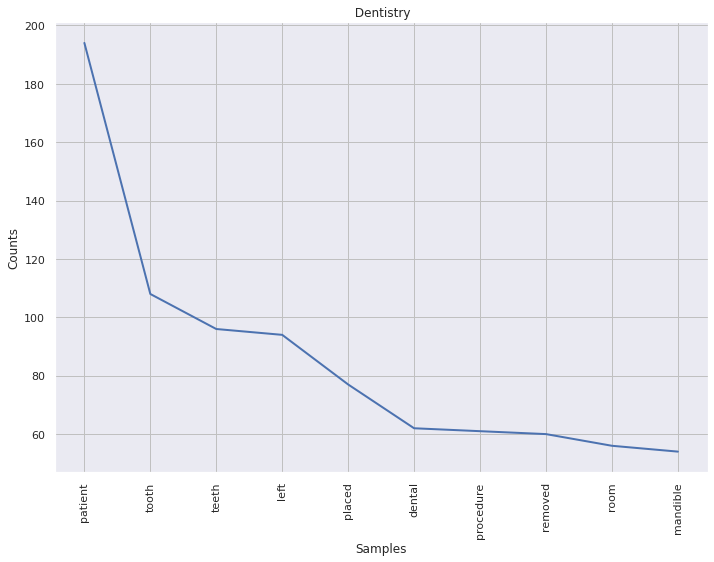

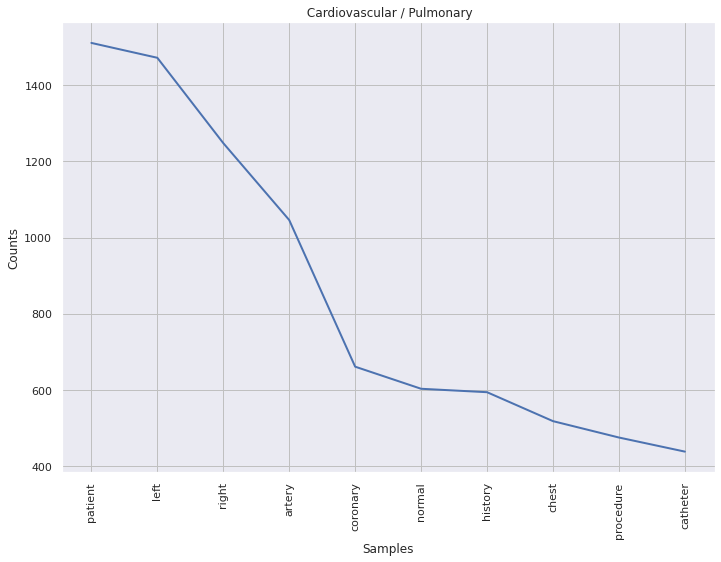

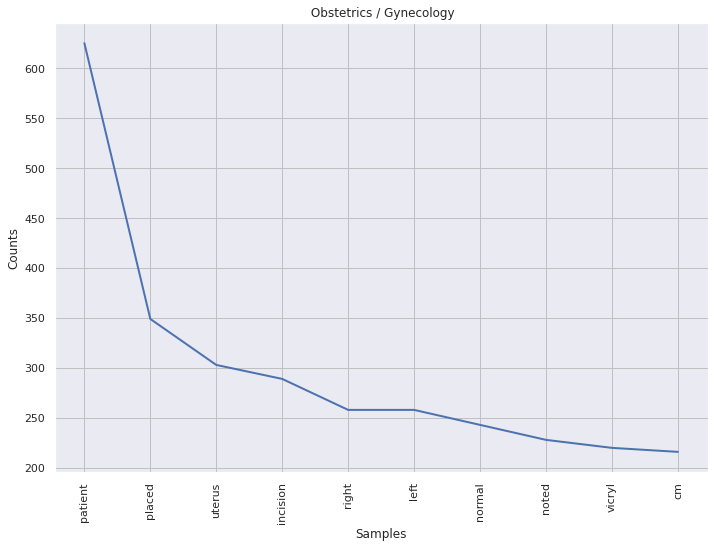

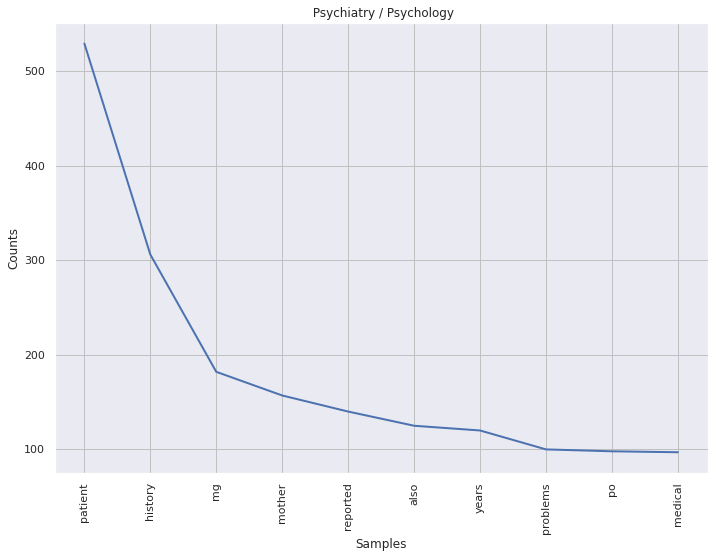

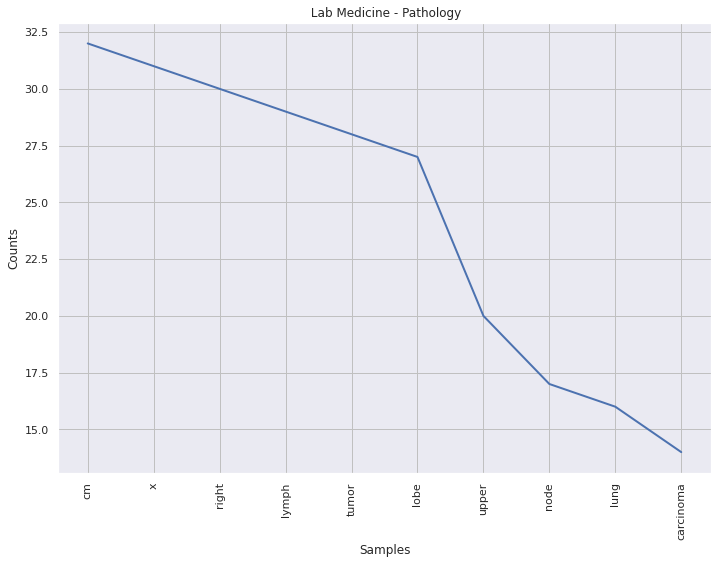

In [58]:
import numpy as np
from itertools import chain
allset={} 
for x in spclts:
  vals=[]
  sec1=req_data[req_data['medical_specialty']==x]
  datas=sec1['transcription']
  datas=datas.tolist()
  vals=list(chain.from_iterable(datas)) 
  allset[x]=nltk.FreqDist(vals)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


list_of=list(spclts)
for i in range(5):
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.set_style('darkgrid')
  plt.title(list_of[i])
  allset[list_of[i]].plot(10)
  print(" ")


